In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv('fin project/train.csv')
test = pd.read_csv('fin project/test.csv')
data.head()

p_id  no_times_pregnant  glucose_concentration  blood_pressure  \
0   316                  2                    112              68   
1    25                 11                    143              94   
2   710                  2                     93              64   
3   658                  1                    120              80   
4   542                  3                    128              72   

   skin_fold_thickness  serum_insulin   bmi  diabetes pedigree  age  diabetes  
0                   22             94  34.1              0.315   26         0  
1                   33            146  36.6              0.254   51         1  
2                   32            160  38.0              0.674   23         1  
3                   48            200  38.9              1.162   41         0  
4                   25            190  32.4              0.549   27         1

In [3]:
data.isna().sum()

p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

In [4]:
data.describe()

p_id  no_times_pregnant  glucose_concentration  blood_pressure  \
count  614.000000         614.000000             614.000000      614.000000   
mean   385.773616           3.853420             120.542345       68.765472   
std    223.603024           3.358126              31.252286       19.914836   
min      1.000000           0.000000               0.000000        0.000000   
25%    191.250000           1.000000              99.000000       62.000000   
50%    387.000000           3.000000             117.000000       72.000000   
75%    572.750000           6.000000             139.000000       80.000000   
max    768.000000          17.000000             197.000000      114.000000   

       skin_fold_thickness  serum_insulin         bmi  diabetes pedigree  \
count           614.000000     614.000000  614.000000         614.000000   
mean             20.244300      79.355049   31.909935           0.466342   
std              15.886083     117.709950    8.007699           0.331090   
min               0.000000       0.000000    0.000000           0.078000   
25%               0.000000       0.000000   27.300000           0.240250   
50%              23.000000      17.000000   32.000000           0.361000   
75%              32.000000     126.000000   36.600000           0.613500   
max              63.000000     846.000000   59.400000           2.420000   

              age    diabetes  
count  614.000000  614.000000  
mean    33.325733    0.348534  
std     11.929569    0.476895  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     41.000000    1.000000  
max     81.000000    1.000000

In [5]:
data = data.drop('p_id',axis=1)
data

no_times_pregnant  glucose_concentration  blood_pressure  \
0                    2                    112              68   
1                   11                    143              94   
2                    2                     93              64   
3                    1                    120              80   
4                    3                    128              72   
..                 ...                    ...             ...   
609                  1                    189              60   
610                  1                     84              64   
611                  2                     92              52   
612                  0                    125              96   
613                  1                    124              74   

     skin_fold_thickness  serum_insulin   bmi  diabetes pedigree  age  \
0                     22             94  34.1              0.315   26   
1                     33            146  36.6              0.254   51   
2                     32            160  38.0              0.674   23   
3                     48            200  38.9              1.162   41   
4                     25            190  32.4              0.549   27   
..                   ...            ...   ...                ...  ...   
609                   23            846  30.1              0.398   59   
610                   23            115  36.9              0.471   28   
611                    0              0  30.1              0.141   22   
612                    0              0  22.5              0.262   21   
613                   36              0  27.8              0.100   30   

     diabetes  
0           0  
1           1  
2           1  
3           0  
4           1  
..        ...  
609         1  
610         0  
611         0  
612         0  
613         0  

[614 rows x 9 columns]

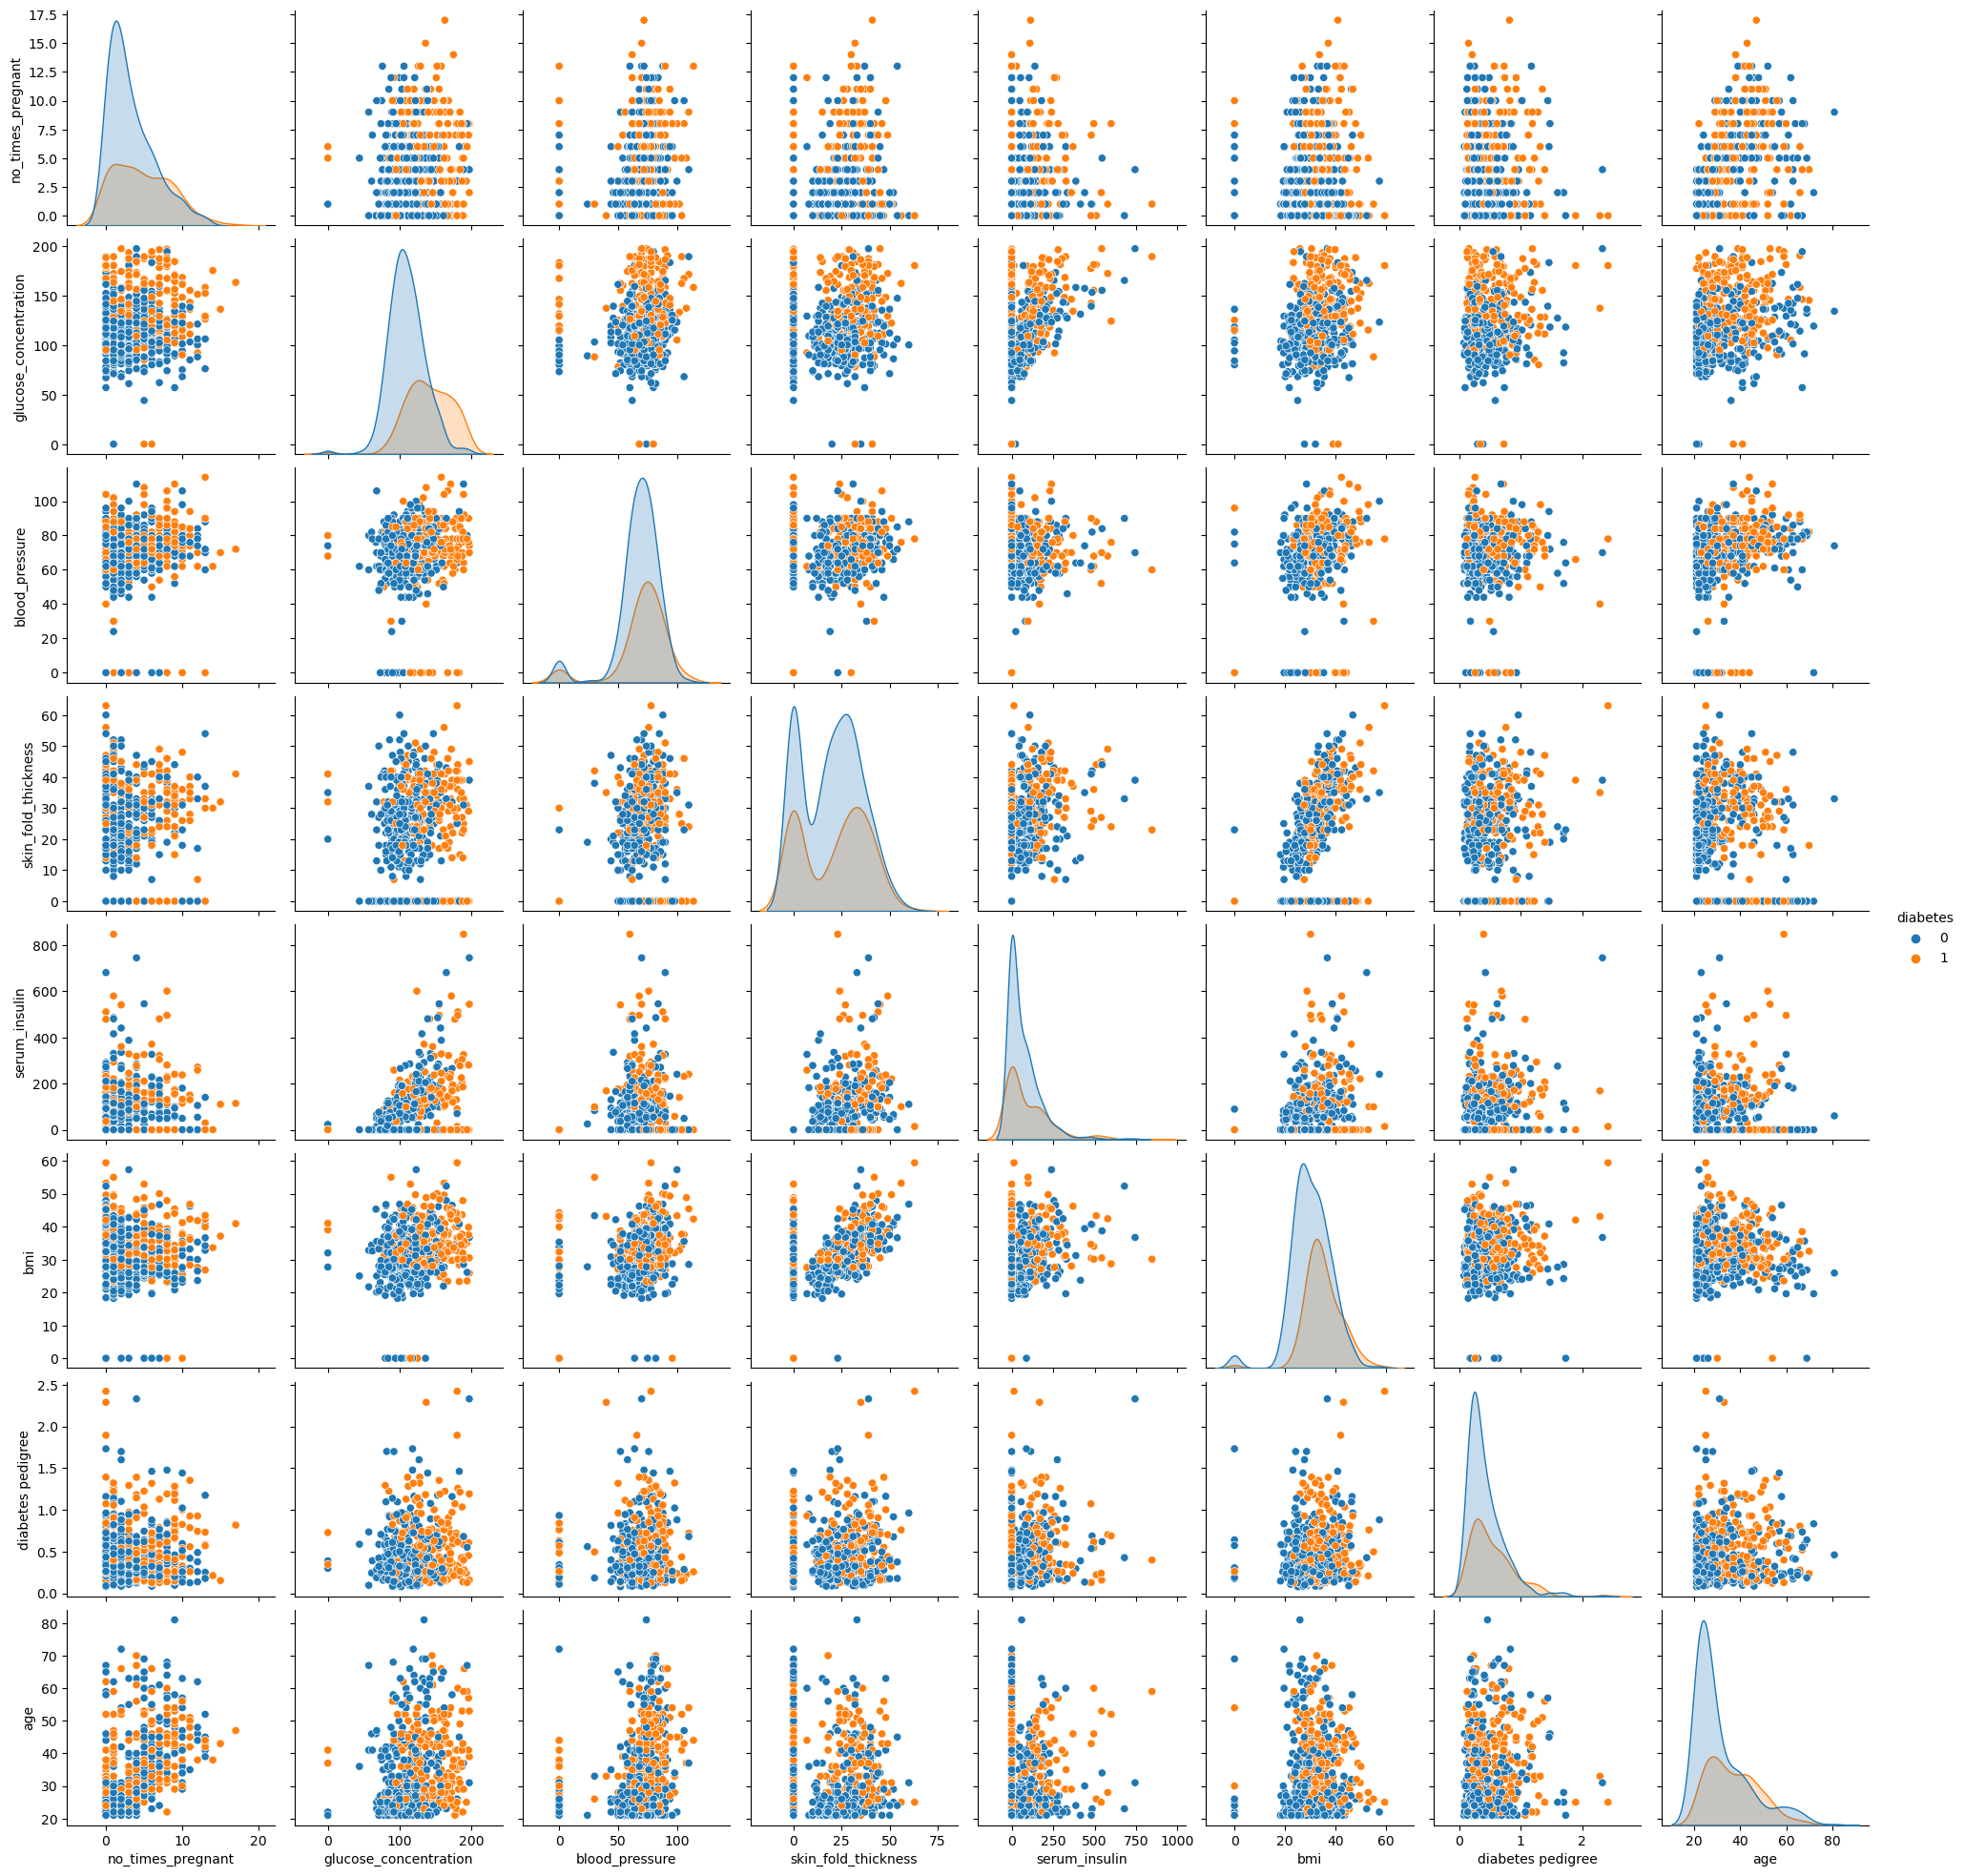

In [6]:
sns.pairplot(data, hue = 'diabetes')
plt.show()

In [7]:
colume = ['glucose_concentration','blood_pressure','skin_fold_thickness','serum_insulin']
data[colume] = data[colume].replace(0,np.nan)

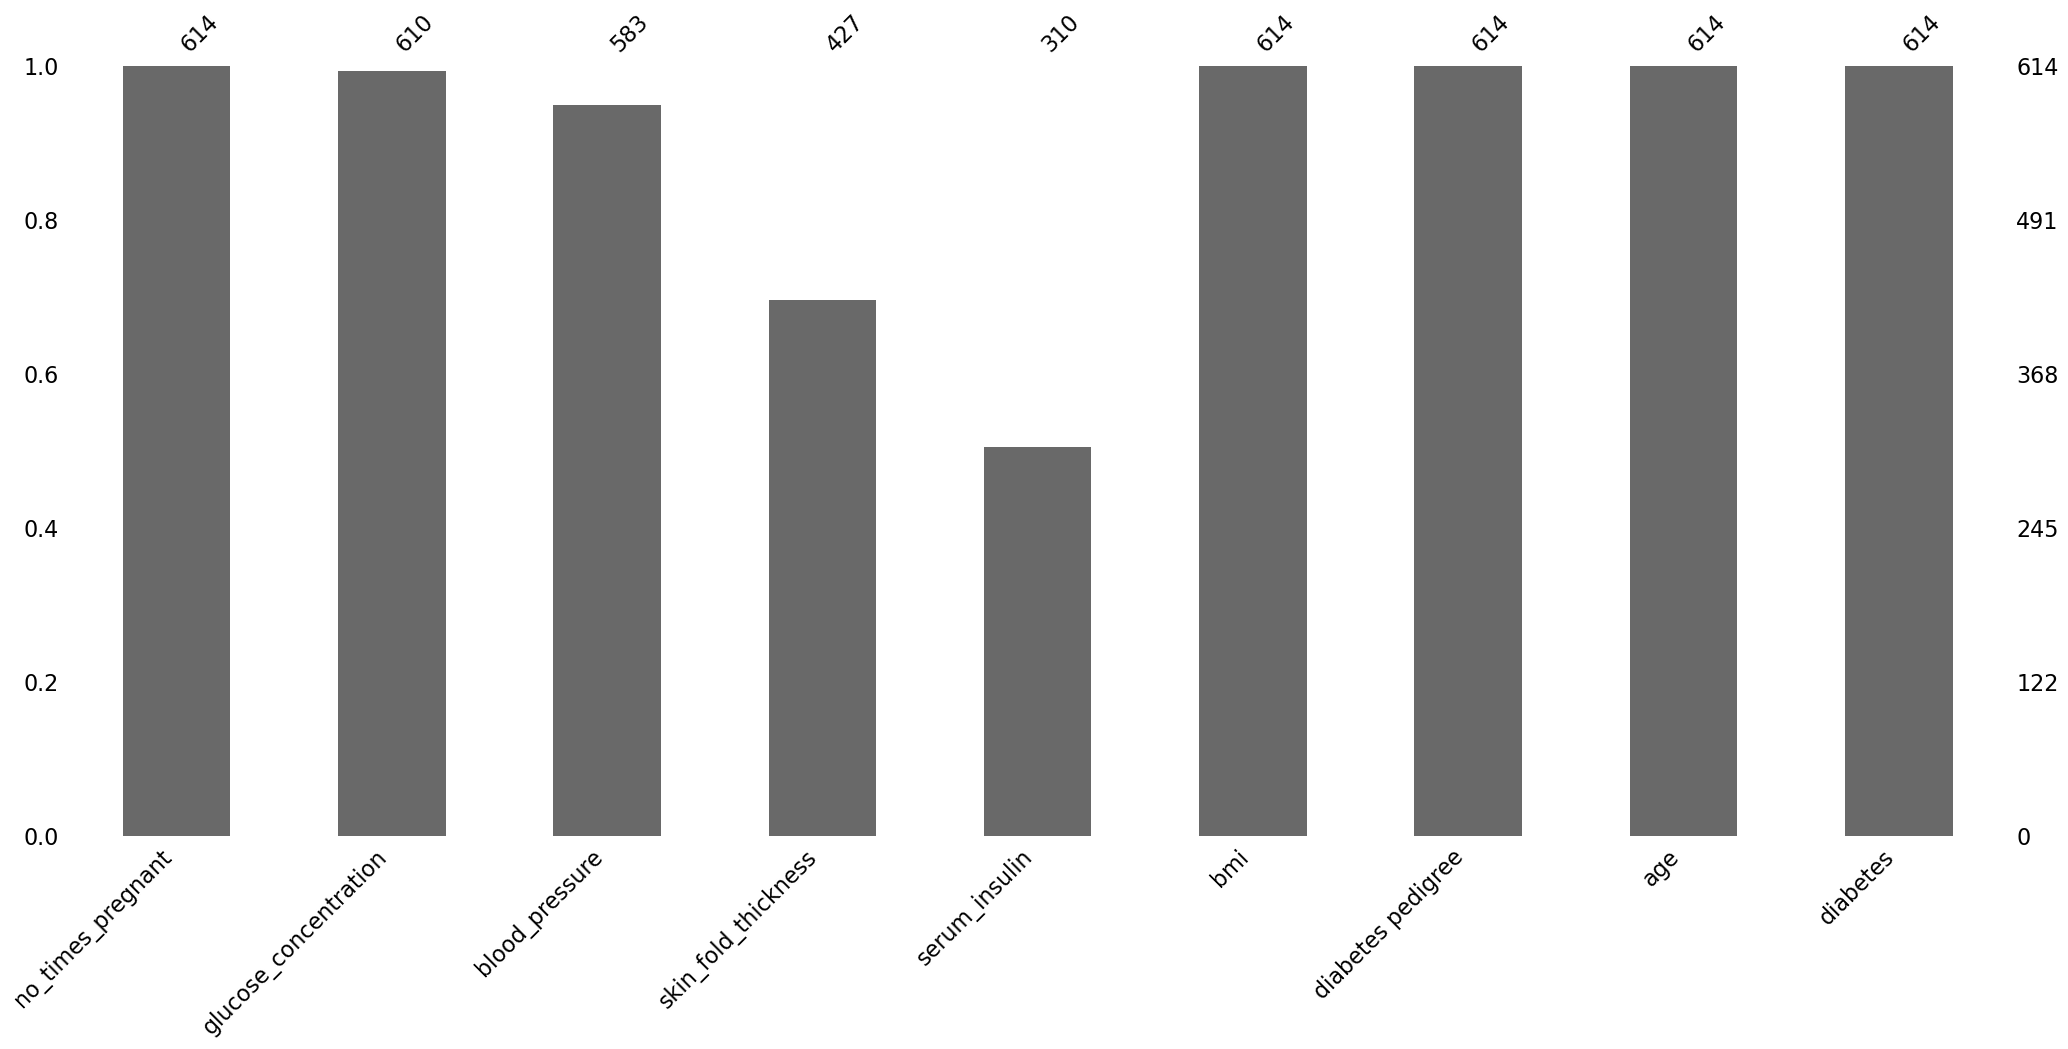

In [8]:
import missingno as msno
msno.bar(data)
plt.show()

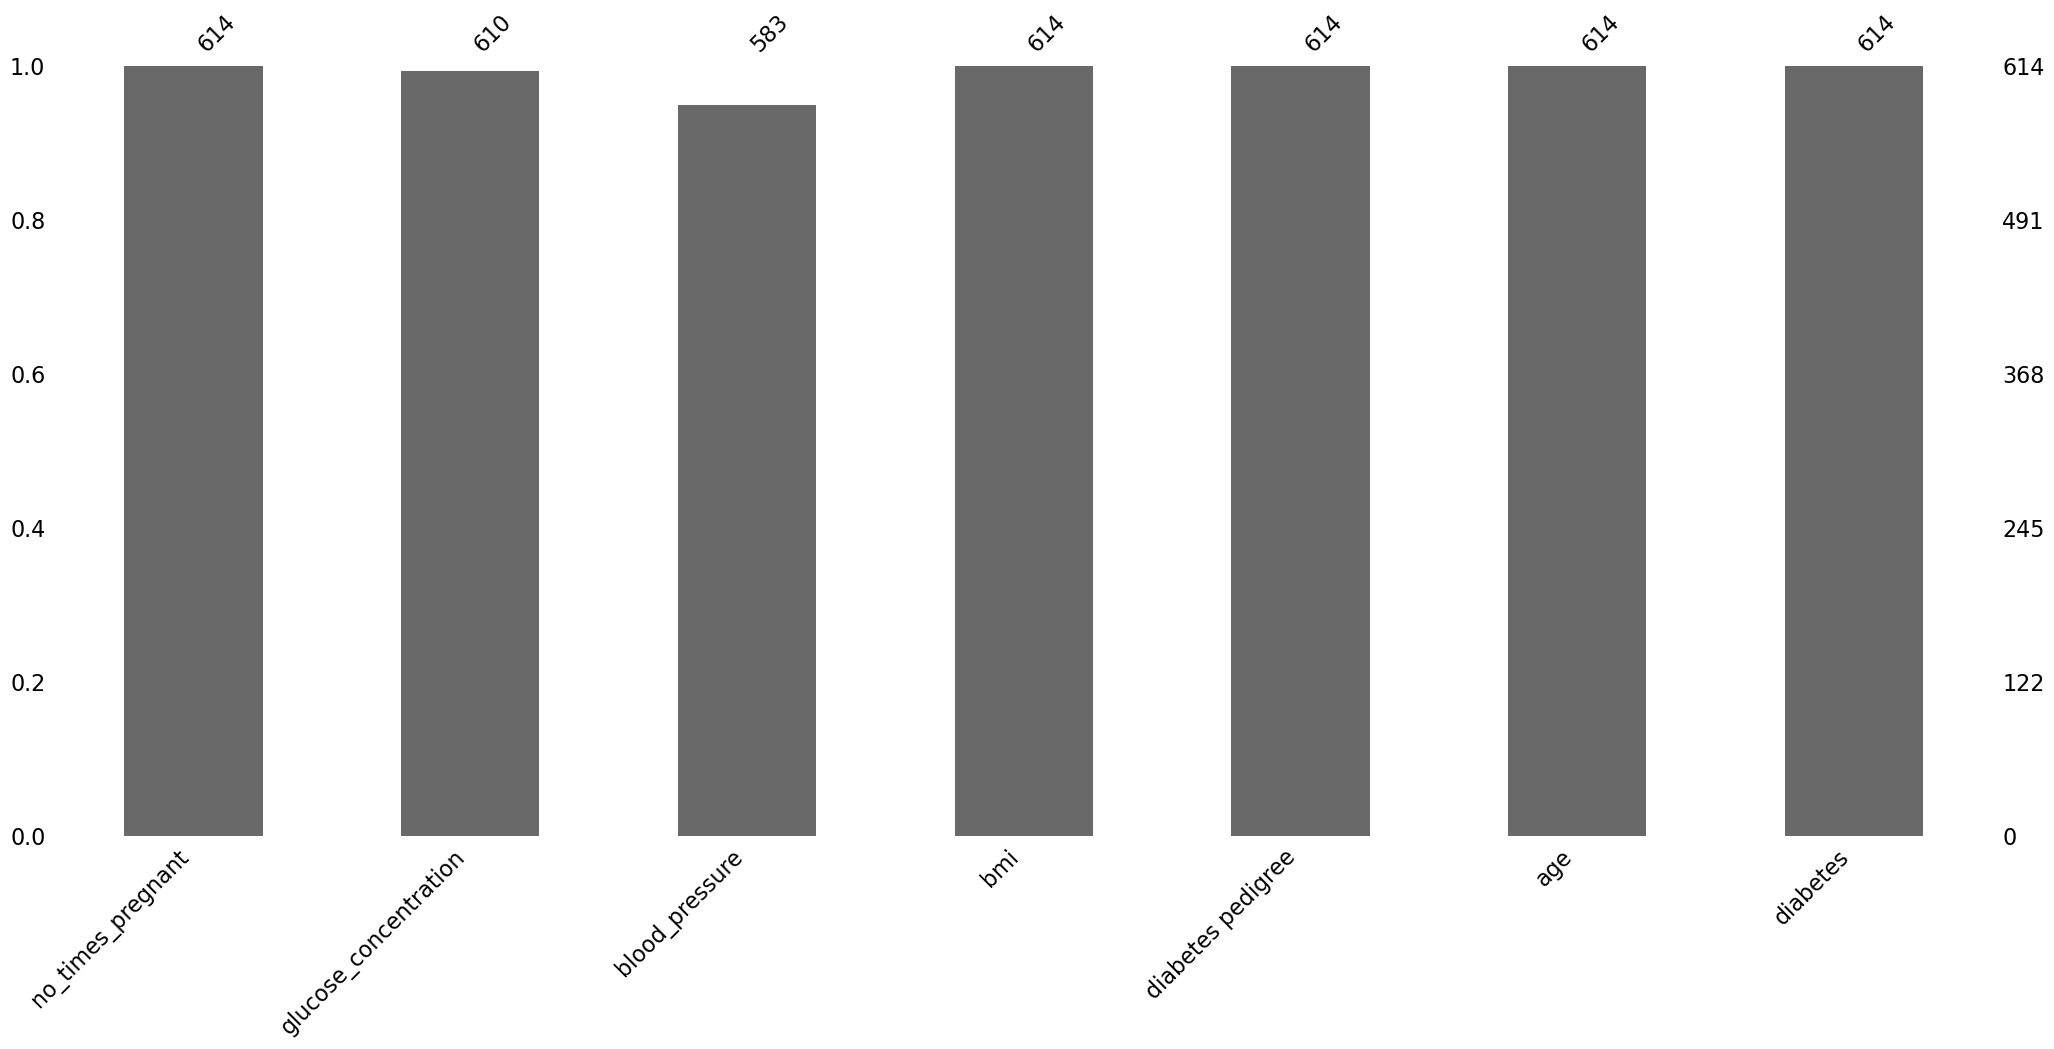

In [9]:
thresh_count = data.shape[0]*0.8
data = data.dropna(thresh=thresh_count,axis=1)
msno.bar(data)
plt.show()

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imr = SimpleImputer(strategy = 'mean')
colume_2 = ['glucose_concentration', 'blood_pressure', 'bmi']

In [12]:
data[colume_2] = imr.fit_transform(data[colume_2])
pd.options.mode.chained_assignment = None

C:\Users\garyk\AppData\Local\Temp\ipykernel_14792\413787372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colume_2] = imr.fit_transform(data[colume_2])


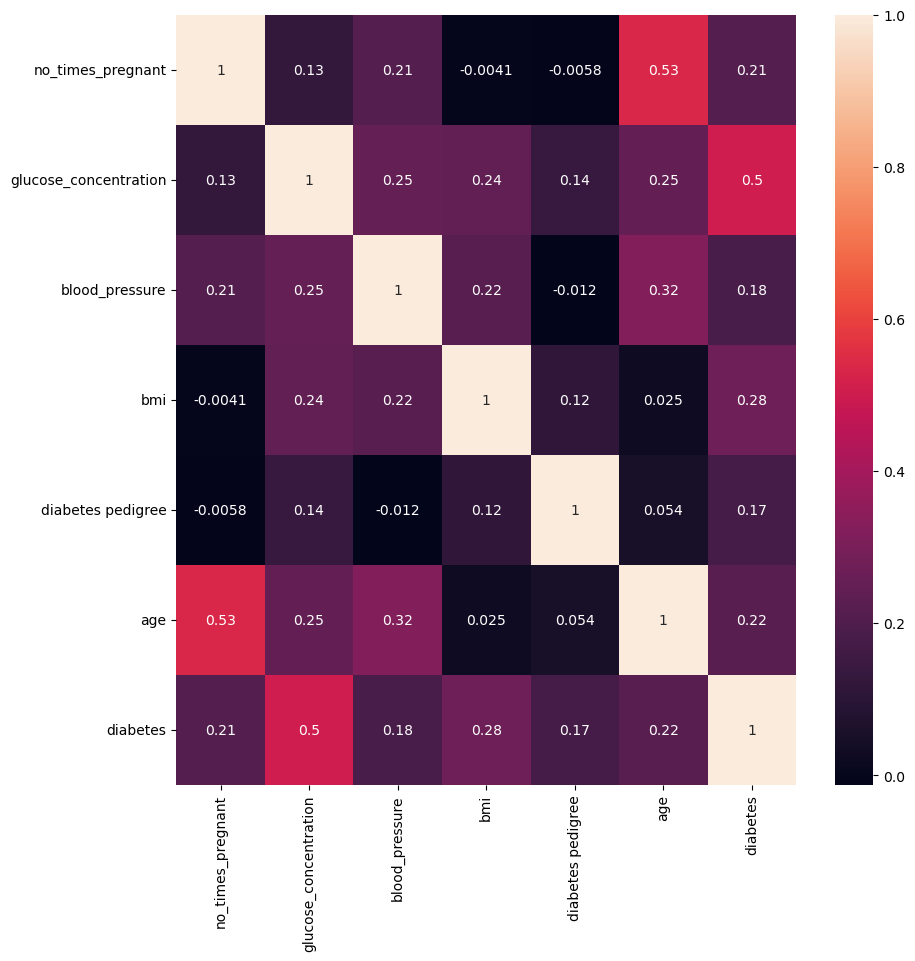

In [13]:
corr = data[['no_times_pregnant','glucose_concentration','blood_pressure','bmi','diabetes pedigree','age','diabetes']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

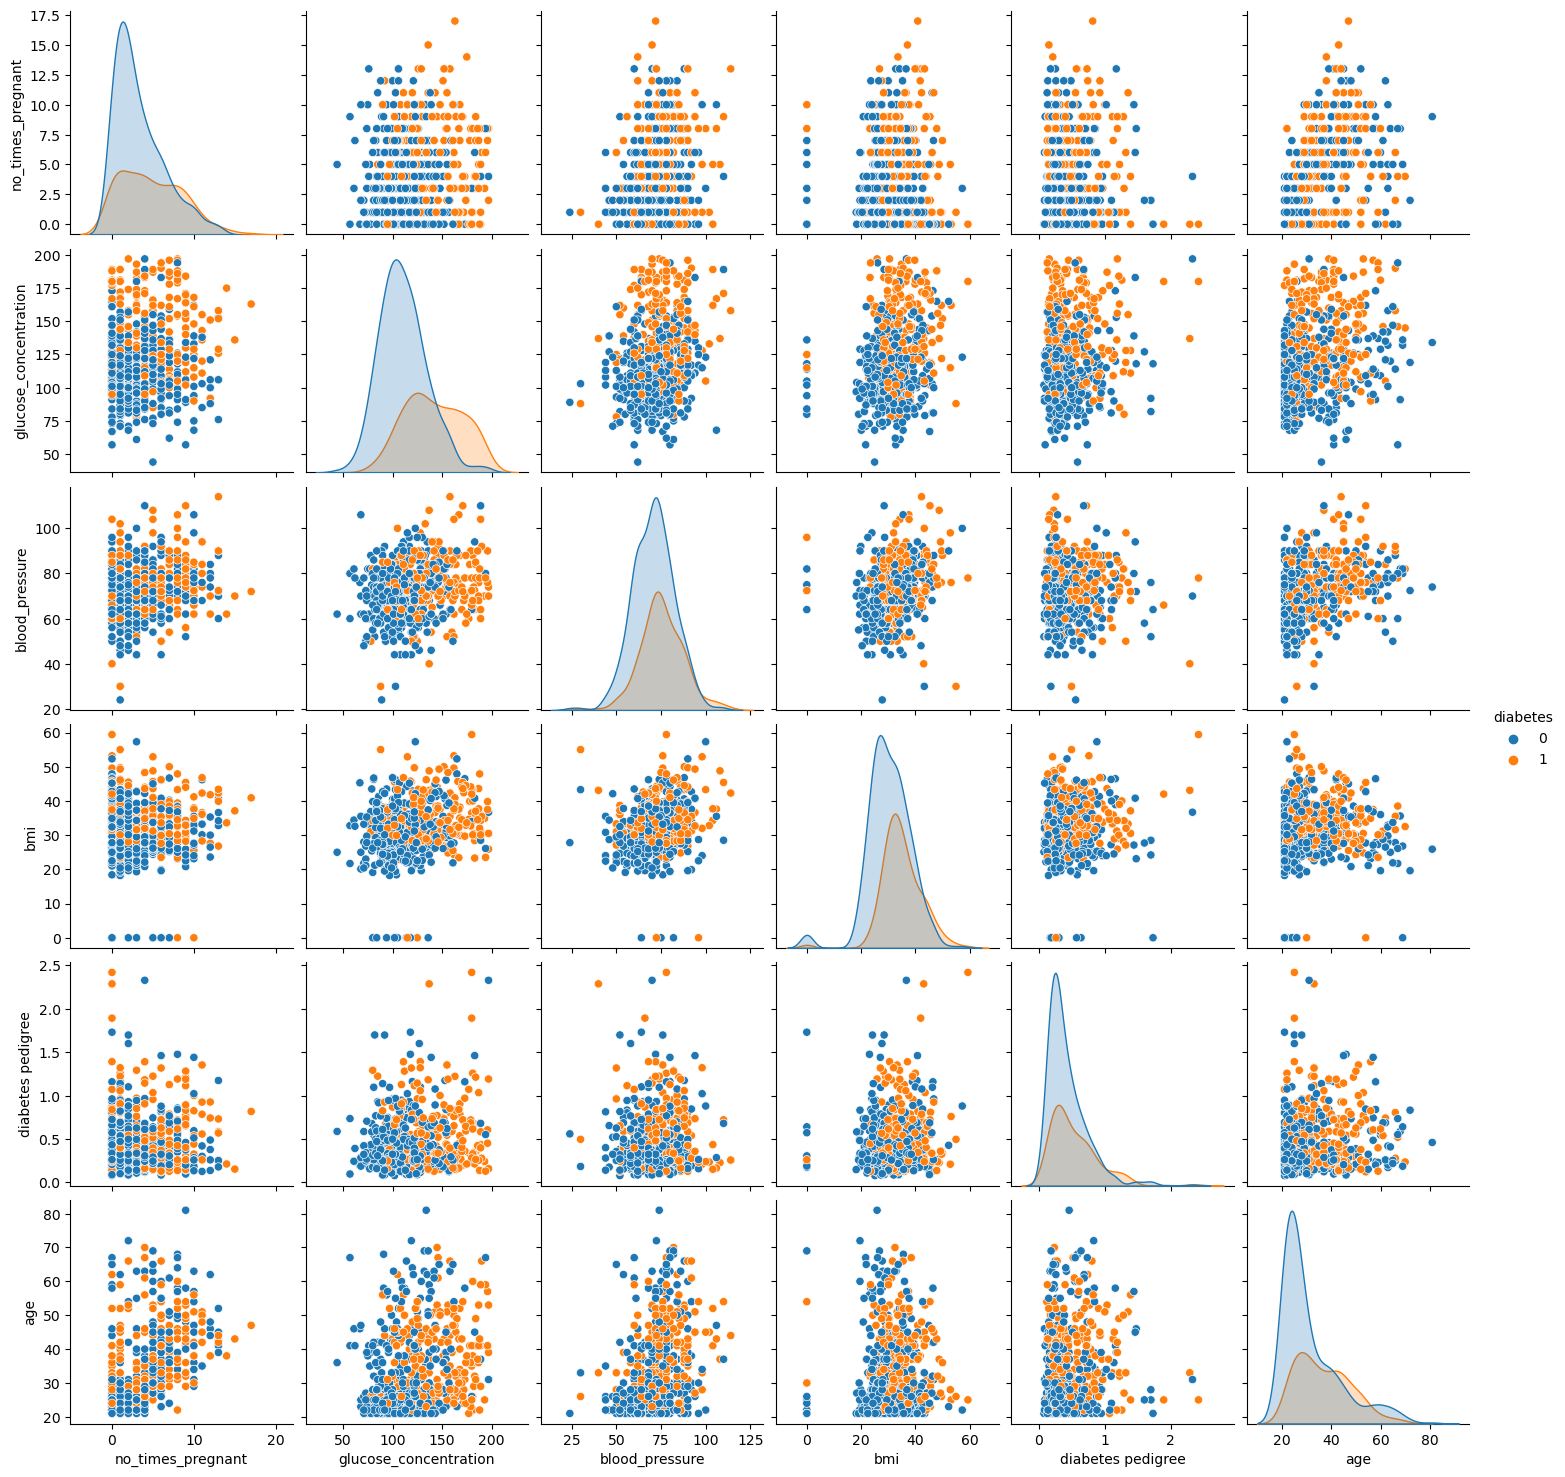

In [14]:
sns.pairplot(data, hue = 'diabetes')
plt.show()

In [15]:
x = data.drop('diabetes',axis = 1)
y = data['diabetes']

In [16]:
from sklearn import ensemble, preprocessing, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)

In [17]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
auc = metrics.auc(fpr, tpr)
print('無限制')
print(auc)
print('特徵重要程度:',model.feature_importances_)

無限制
0.6388081395348837
特徵重要程度: [0.09231079 0.3197542  0.0927948  0.18508449 0.15460415 0.15545157]


In [18]:
y = data['diabetes']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)
model = RandomForestClassifier(n_estimators = 100, max_depth = 5)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
auc = metrics.auc(fpr, tpr)
print(auc)
print('特徵重要程度:',model.feature_importances_)

0.6924418604651162
特徵重要程度: [0.07502502 0.40935164 0.05893597 0.18252837 0.11442997 0.15972903]


In [19]:
x = data.drop('diabetes', axis = 1)
x = x.drop('no_times_pregnant', axis = 1)
y = data['diabetes']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)
model = RandomForestClassifier(n_estimators = 100, max_depth = 5)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
auc = metrics.auc(fpr, tpr)
print('去掉懷孕次數: ')
print(auc)
print('特徵重要程度:',model.feature_importances_)


去掉懷孕次數: 
0.7406976744186048
特徵重要程度: [0.47402473 0.06433604 0.16357754 0.11630992 0.18175177]


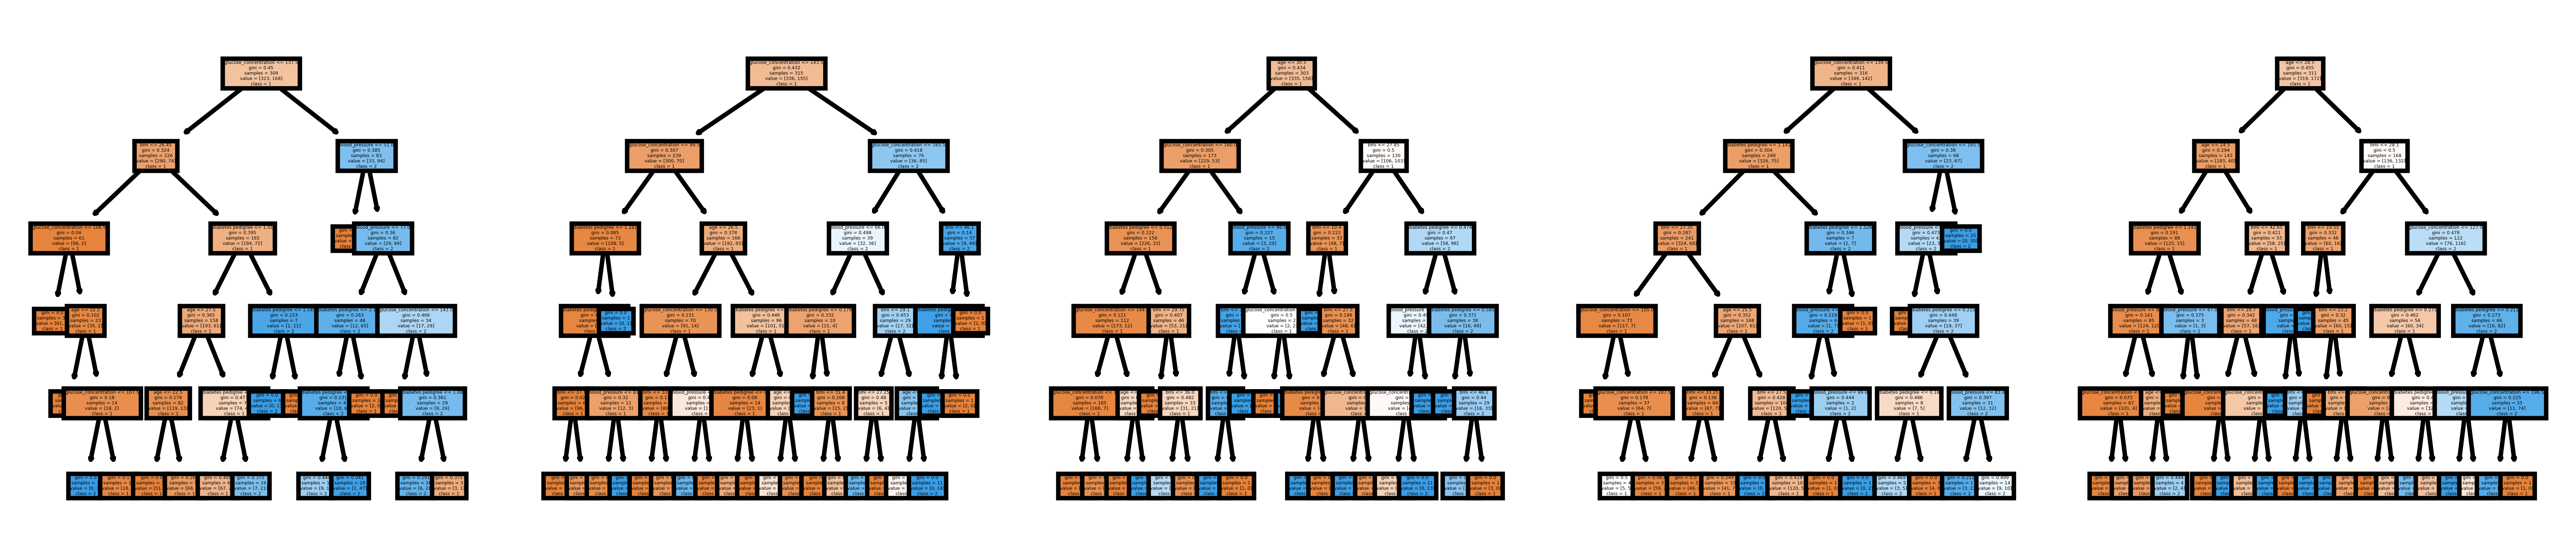

In [20]:
from IPython.display import Image
from sklearn import tree

featureName=['glucose_concentration','blood_pressure','bmi','diabetes pedigree','age','diabetes']

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
className=['1','2','3']

for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = featureName, 
                   class_names=className,
                   filled = True,
                   ax = axes[index]);
plt.show()

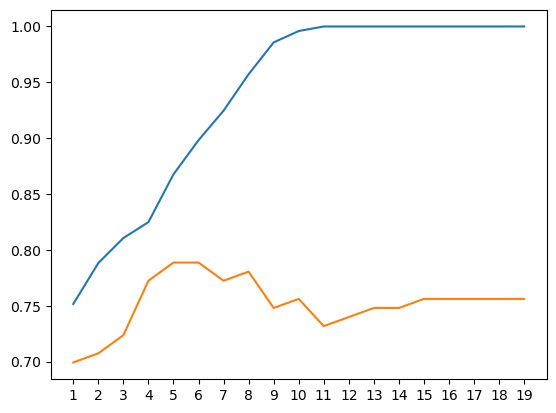

max acc: 0.7886178861788617
5


In [21]:
depth = []
train_acc = []
test_acc = []

for i in range(1,20):
    clf = RandomForestClassifier(criterion = 'gini', max_depth = i, random_state = 0)
    clf = clf.fit(x_train, y_train)
    predY = clf.predict(x_train)
    predY2 = clf.predict(x_test)
    depth.append(str(i))
    train_acc.append(accuracy_score(y_train, predY))
    test_acc.append(accuracy_score(y_test, predY2))
    
plt.plot(depth, train_acc, test_acc)
plt.show()

print('max acc:',max(test_acc))
print(test_acc.index(max(test_acc)) + 1)

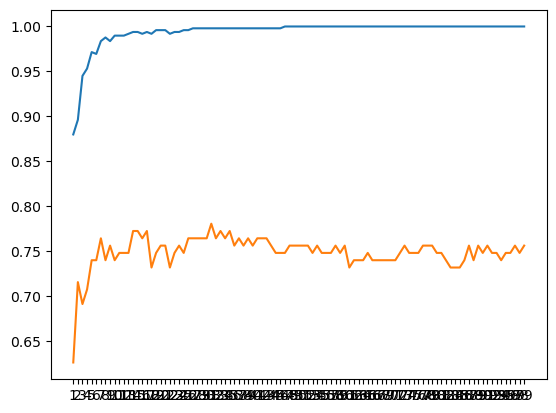

max acc: 0.7804878048780488
31


In [22]:
estimators = []
train_acc = []
test_acc = []

for i in range(1,100):
    clf = RandomForestClassifier(criterion = 'gini', n_estimators = i, random_state = 0)
    clf = clf.fit(x_train, y_train)
    predY = clf.predict(x_train)
    predY2 = clf.predict(x_test)
    estimators.append(str(i))
    train_acc.append(accuracy_score(y_train, predY))
    test_acc.append(accuracy_score(y_test, predY2))
    
plt.plot(estimators, train_acc, test_acc)
plt.show()

print('max acc:',max(test_acc))
print(test_acc.index(max(test_acc)) + 1)

In [23]:
print(model.score(x_test, y_test))

0.7886178861788617


In [37]:
x = data.drop('diabetes', axis = 1)
x = x.drop('no_times_pregnant', axis = 1)
y = data['diabetes']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)
model = RandomForestClassifier(n_estimators = 31, max_depth = 5)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
auc = metrics.auc(fpr, tpr)
print('最終模型: ')
print(auc)
print('特徵重要程度:',model.feature_importances_)

最終模型: 
0.7934593023255814
特徵重要程度: [0.36518237 0.07320272 0.22046237 0.1408414  0.20031114]
